<a href="https://colab.research.google.com/github/dianaislamiyati/DTS_Data-Science_Challenge-3/blob/main/kel4_challenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas.util.testing as tm

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('../content/GlobalLandTemperaturesByMajorCity.csv')

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
rio = df.loc[df['City'] == 'Rio De Janeiro', ['dt','AverageTemperature']]
rio.columns = ['Date','Temp']
rio['Date'] = pd.to_datetime(rio['Date'])
rio.reset_index(drop=True, inplace=True)
rio.set_index('Date', inplace=True)

In [ ]:
#the temperature just from 1900 until the end of 2012
rio = rio.loc['1900':'2013-01-01']
rio = rio.asfreq('M', method='bfill')
rio.head()

,Temp
Date,
1900-01-31,25.780
1900-02-28,26.160
1900-03-31,23.868
1900-04-30,23.467
1900-05-31,22.667


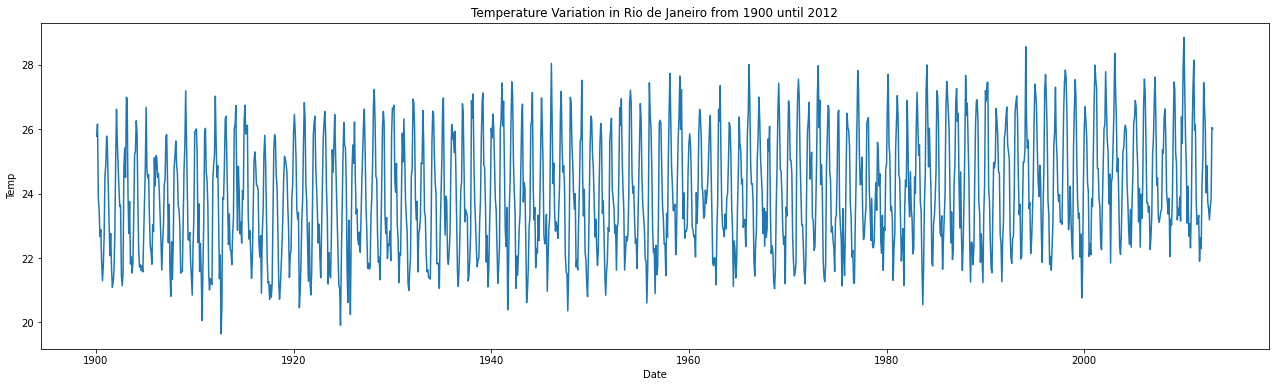

In [ ]:
plt.figure(figsize=(22,6))
sns.lineplot(x=rio.index, y=rio['Temp'])
plt.title('Temperature Variation in Rio de Janeiro from 1900 until 2012')
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
pmodel = Prophet()

In [ ]:
subset = rio.reset_index()[['Date', 'Temp']]
subset.rename(columns={"Date": "ds", "Temp": "y"}, inplace=True)
subset.head()

,ds,y
0,1900-01-31,25.780
1,1900-02-28,26.160
2,1900-03-31,23.868
3,1900-04-30,23.467
4,1900-05-31,22.667


In [ ]:
pmodel.fit(subset)
future = pmodel.make_future_dataframe(periods=30, freq='12M')
forecast = pmodel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1381,2038-12-31,27.131830,26.133822,28.084054
1382,2039-12-31,27.159141,26.137313,28.107430
1383,2040-12-31,27.146761,26.065160,28.010650
1384,2041-12-31,27.179277,26.222622,28.102781
1385,2042-12-31,27.209194,26.229792,28.219980


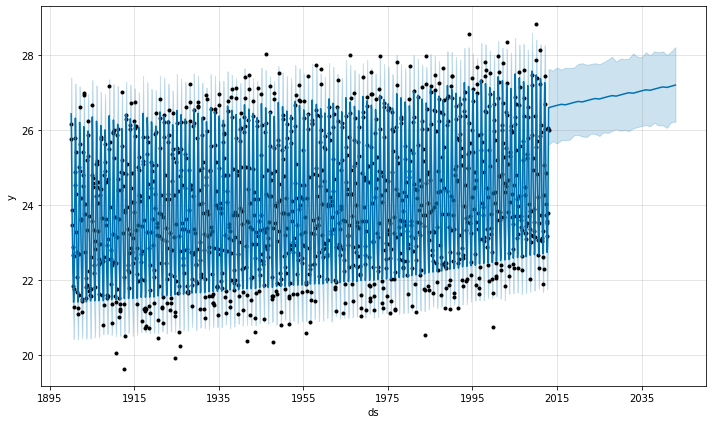

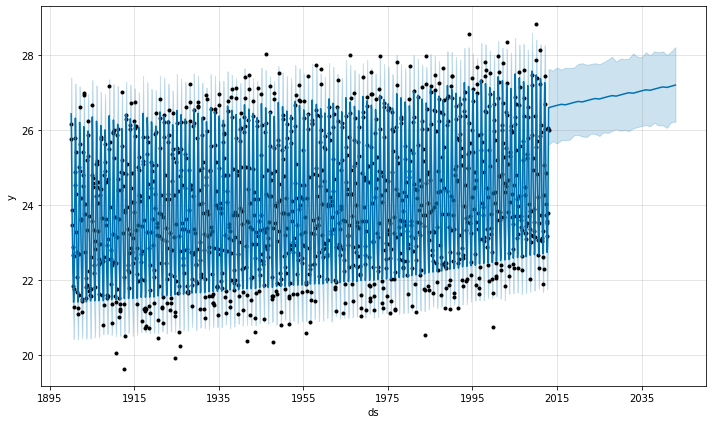

In [ ]:
pmodel.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


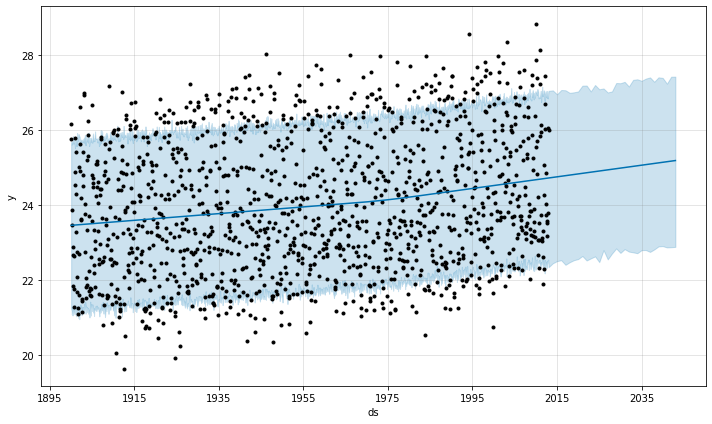

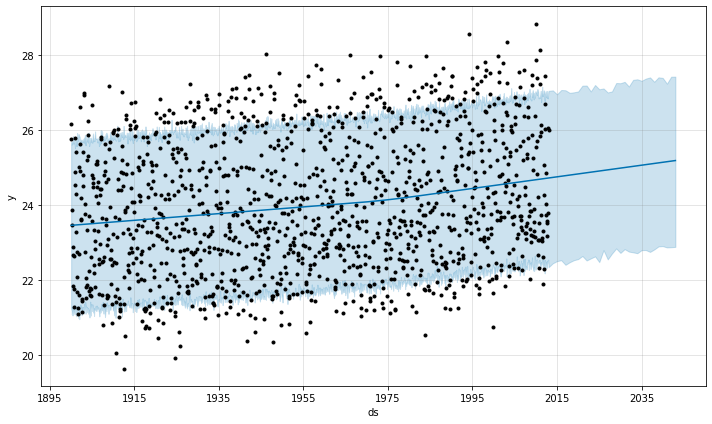

In [ ]:
# variant 1
m2 = Prophet(growth='linear',
             seasonality_prior_scale=1,
             yearly_seasonality=False,
             weekly_seasonality=False)
m2.fit(subset)
forecast2 = m2.predict(future)
m2.plot(forecast2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


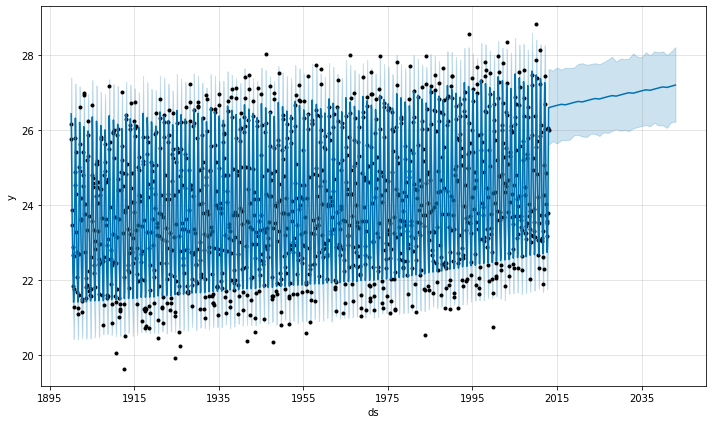

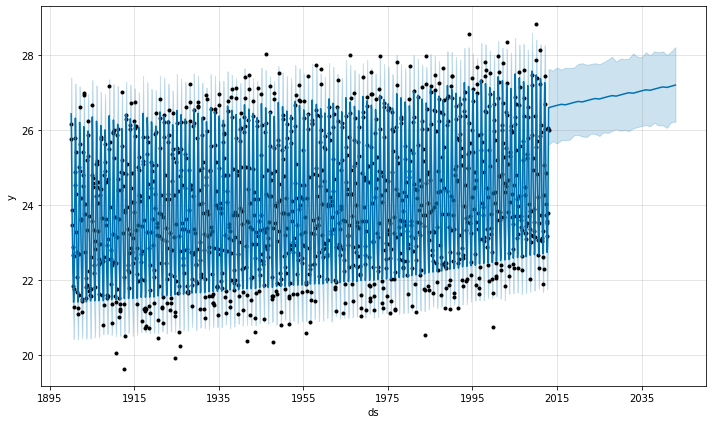

In [ ]:
# variant 2
m2 = Prophet(growth='linear',
             seasonality_prior_scale=15,
             yearly_seasonality=False,
             weekly_seasonality=False)
m2.fit(subset)
forecast2 = m2.predict(future)
m2.plot(forecast)

In [ ]:
subset = rio.reset_index()[['Date', 'Temp']]
subset.rename(columns={'Date': 'ds', 'Temp': 'y'}, inplace=True)
subset.head()

,ds,y
0,1900-01-31,25.780
1,1900-02-28,26.160
2,1900-03-31,23.868
3,1900-04-30,23.467
4,1900-05-31,22.667


In [ ]:
prophet = Prophet(yearly_seasonality=False, weekly_seasonality=False)
prophet.fit(subset)
future = prophet.make_future_dataframe(periods=25, freq='12M')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = prophet.predict(future)

ConversionError: ignored

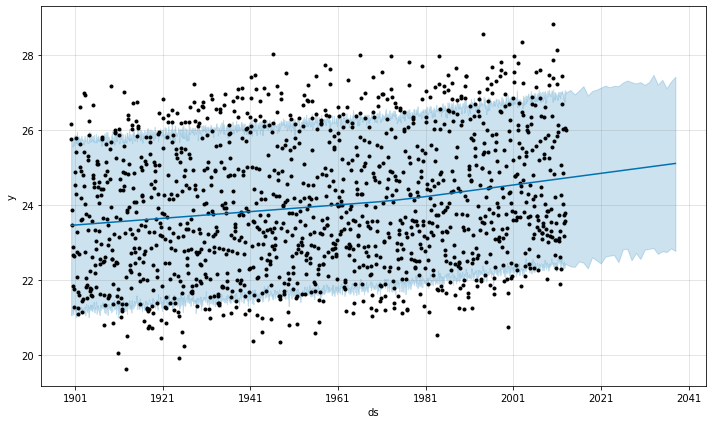

In [ ]:
prophet.plot(forecast)
plt.axvline(x='2038-12-31')

In [ ]:
print(rio.iloc[-1]['Temp'])
print(forecast[forecast.ds == '2038-12-31'].iloc[0]['yhat'])
print(forecast[forecast.ds == '2042-12-31'].iloc[0]['yhat_upper'])

26.009


IndexError: ignored